In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from qiskit.circuit.library import TwoLocal, EfficientSU2

import sys
sys.path.append('../utility')
from vqe_run import *
from qc_ansatze import *

# lambda = 1.0

this notebook is a copy of the lambda=0.2 notebook. Original 8 ansatze were used. 

In [2]:
Hpauli =[('IIIIII', 6.75),
  ('IIIIIZ', -0.5),
  ('IIIIZI', -0.5),
  ('IIIZII', -0.5),
  ('IIZIII', -0.5),
  ('IXXIXX', -0.25),
  ('IZIIII', -0.5),
  ('XIXXIX', -0.25),
  ('XXIXXI', -0.25),
  ('ZIIIII', -0.5)]

from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import NumPyEigensolver
H4q = SparsePauliOp.from_list(Hpauli)

# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q)
print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
E_exact

Exact Result of qubit hamiltonian: [3.69722436 4.65707692 4.65707692 4.65707692]


3.69722

# TwoLocal circuit ansatze

In [3]:
ansatz_0a = TL_ansatz(H4q.num_qubits, 'ry', 'crx', "circular", 1)
ansatz_0b = TL_ansatz(H4q.num_qubits, 'rz', 'crx', 'circular', 1)
ansatz_0c = TL_ansatz(H4q.num_qubits, ['ry','rz'], 'crx', 'circular', 1)
ansatz_0d = TL_ansatz(H4q.num_qubits,['ry','y'], 'crx', 'circular', 1)

ansatz_1a =  TL_ansatz(H4q.num_qubits, 'ry', 'crx', "full", 1)
ansatz_1b =  TL_ansatz(H4q.num_qubits, 'rz', 'crx', "full", 1)
ansatz_1c =  TL_ansatz(H4q.num_qubits, ['ry','rz'], 'crx', "full", 1)
ansatz_1d =  TL_ansatz(H4q.num_qubits, ['ry','y'], 'crx', "full", 1)

Circuit ansatz with 18 parameters
Circuit ansatz with 18 parameters
Circuit ansatz with 30 parameters
Circuit ansatz with 18 parameters
Circuit ansatz with 27 parameters
Circuit ansatz with 27 parameters
Circuit ansatz with 39 parameters
Circuit ansatz with 27 parameters


In [4]:
tl = [ansatz_0a,ansatz_0b,ansatz_0c, ansatz_0d,
     ansatz_1a,ansatz_1b,ansatz_1c, ansatz_1d]
tl_names = ['ansatz_0a','ansatz_0b','ansatz_0c', 'ansatz_0d',
     'ansatz_1a','ansatz_1b','ansatz_1c', 'ansatz_1d']

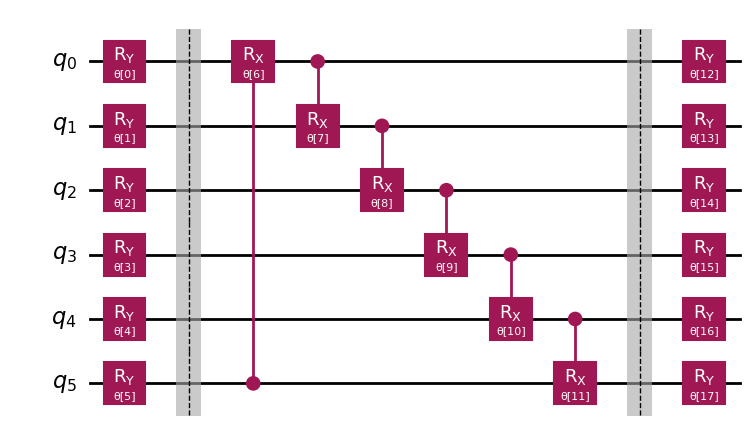

In [5]:
tl[0].decompose().draw(output='mpl',fold=1)

# EfficientSU2

In [6]:
ansatz_0a_su2 = ef_ansatz(H4q.num_qubits, 'ry',  "circular", 1)
ansatz_0b_su2 = ef_ansatz(H4q.num_qubits, 'rz',  'circular', 1)
ansatz_0c_su2 = ef_ansatz(H4q.num_qubits, ['ry','rz'], 'circular', 1)
ansatz_0d_su2 = ef_ansatz(H4q.num_qubits,['ry','y'], 'circular', 1)

ansatz_1a_su2 =  ef_ansatz(H4q.num_qubits, 'ry',  "full", 1)
ansatz_1b_su2 =  ef_ansatz(H4q.num_qubits, 'rz',  "full", 1)
ansatz_1c_su2 =  ef_ansatz(H4q.num_qubits, ['ry','rz'], "full", 1)
ansatz_1d_su2 =  ef_ansatz(H4q.num_qubits, ['ry','y'],  "full", 1)

Circuit ansatz with 12 parameters
Circuit ansatz with 12 parameters
Circuit ansatz with 24 parameters
Circuit ansatz with 12 parameters
Circuit ansatz with 12 parameters
Circuit ansatz with 12 parameters
Circuit ansatz with 24 parameters
Circuit ansatz with 12 parameters


In [7]:
effsu2 = [ansatz_0a_su2, ansatz_0b_su2, ansatz_0c_su2,ansatz_0d_su2, 
          ansatz_1a_su2, ansatz_1b_su2, ansatz_1c_su2, ansatz_1d_su2]
effsu2_names = ['ansatz_0a_su2', 'ansatz_0b_su2', 'ansatz_0c_su2','ansatz_0d_su2', 
          'ansatz_1a_su2', 'ansatz_1b_su2', 'ansatz_1c_su2', 'ansatz_1d_su2']

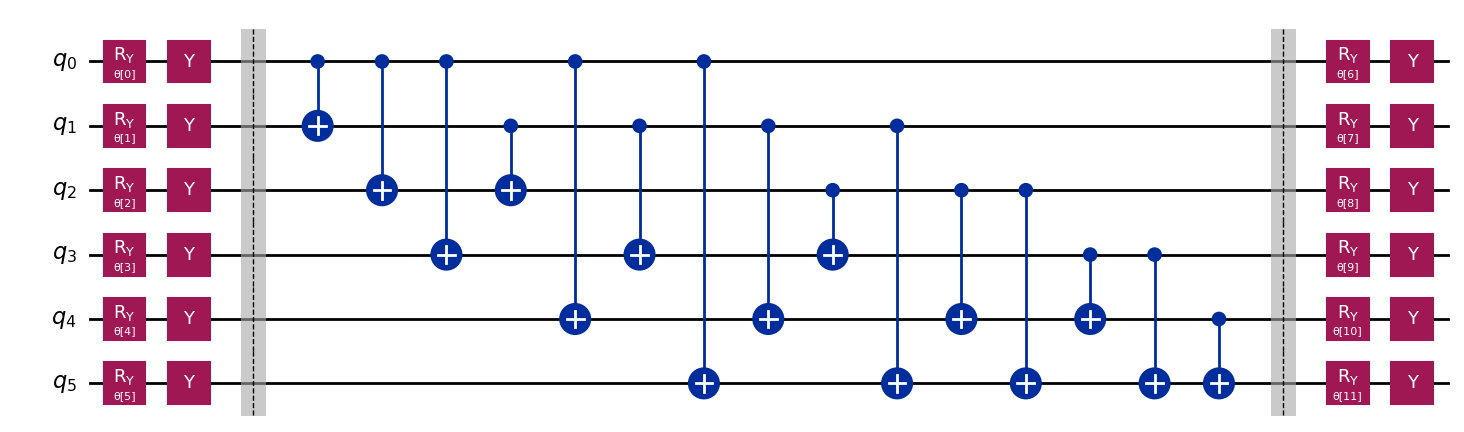

In [8]:
ansatz_1d_su2.decompose().draw(output='mpl',fold=1)

# QVE

## COBYLA: EffSU2

In [9]:
res_list = []
for i in range(len(effsu2)):
    print(f'At step {i} with {effsu2_names[i]}')
    qve = QVE(COBYLA, effsu2[i], H4q, iterations_=300)
    result = qve.run_qve_w_specified_optimizer()
    print(f'Length of this optimization {len(qve.values)} \n')
    res_list.append(pd.DataFrame({effsu2_names[i]:qve.values}))
    
df1 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df1.to_csv('results/qve_l2_l1.0_effsu2_cobyla.csv')

At step 0 with ansatz_0a_su2
VQE result: 3.77051
Length of this optimization 167 

At step 1 with ansatz_0b_su2
VQE result: 3.74902
Length of this optimization 73 

At step 2 with ansatz_0c_su2
VQE result: 3.78516
Length of this optimization 300 

At step 3 with ansatz_0d_su2
VQE result: 3.79297
Length of this optimization 169 

At step 4 with ansatz_1a_su2
VQE result: 3.80469
Length of this optimization 146 

At step 5 with ansatz_1b_su2
VQE result: 3.74902
Length of this optimization 73 

At step 6 with ansatz_1c_su2
VQE result: 3.76465
Length of this optimization 300 

At step 7 with ansatz_1d_su2
VQE result: 3.75879
Length of this optimization 124 



In [10]:
df1

,ansatz_0a_su2,ansatz_0b_su2,ansatz_0c_su2,ansatz_0d_su2,ansatz_1a_su2,ansatz_1b_su2,ansatz_1c_su2,ansatz_1d_su2
0,6.754883,3.749023,6.649414,6.522461,6.651367,3.749023,6.644531,6.738281
1,6.708984,3.749023,6.726562,6.028320,6.637695,3.749023,6.113281,6.071289
2,6.990234,3.749023,6.702148,5.976562,6.565430,3.749023,6.210938,6.223633
3,6.663086,3.749023,6.482422,6.214844,6.414062,3.749023,6.125000,6.236328
4,7.088867,3.749023,6.544922,5.944336,6.499023,3.749023,6.080078,6.030273
...,...,...,...,...,...,...,...,...
295,NaN,NaN,3.789062,NaN,NaN,NaN,3.764648,NaN
296,NaN,NaN,3.788086,NaN,NaN,NaN,3.764648,NaN
297,NaN,NaN,3.788086,NaN,NaN,NaN,3.764648,NaN
298,NaN,NaN,3.785156,NaN,NaN,NaN,3.764648,NaN


## COBYLA: TwoLocal

In [11]:
res_list = []
for i in range(len(tl)):
    print(f'At step {i} with {tl_names[i]}')
    qve = QVE(COBYLA, tl[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    print(f'Length of this optimization {len(qve.values)} \n')
    res_list.append(pd.DataFrame({tl_names[i]:qve.values}))
    
df2 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df2.to_csv('results/qve_l2_l1.0_twolocal_cobyla.csv')

At step 0 with ansatz_0a
VQE result: 3.73730
Length of this optimization 189 

At step 1 with ansatz_0b
VQE result: 3.74902
Length of this optimization 109 

At step 2 with ansatz_0c
VQE result: 3.73828
Length of this optimization 250 

At step 3 with ansatz_0d
VQE result: 3.73730
Length of this optimization 189 

At step 4 with ansatz_1a
VQE result: 3.74023
Length of this optimization 250 

At step 5 with ansatz_1b
VQE result: 3.74902
Length of this optimization 163 

At step 6 with ansatz_1c
VQE result: 3.76758
Length of this optimization 250 

At step 7 with ansatz_1d
VQE result: 3.74023
Length of this optimization 250 



In [12]:
df2

,ansatz_0a,ansatz_0b,ansatz_0c,ansatz_0d,ansatz_1a,ansatz_1b,ansatz_1c,ansatz_1d
0,6.716797,3.749023,7.324219,6.716797,6.813477,3.749023,7.880859,6.813477
1,6.274414,3.749023,7.125000,6.274414,6.451172,3.749023,7.828125,6.451172
2,5.785156,3.749023,6.854492,5.785156,6.276367,3.749023,7.642578,6.276367
3,5.256836,3.749023,6.619141,5.256836,6.597656,3.749023,7.836914,6.597656
4,5.266602,3.749023,6.397461,5.266602,6.678711,3.749023,7.555664,6.678711
...,...,...,...,...,...,...,...,...
245,NaN,NaN,3.741211,NaN,3.741211,NaN,3.767578,3.741211
246,NaN,NaN,3.741211,NaN,3.740234,NaN,3.778320,3.740234
247,NaN,NaN,3.743164,NaN,3.740234,NaN,3.775391,3.740234
248,NaN,NaN,3.738281,NaN,3.740234,NaN,3.769531,3.740234


## SPSA

In [13]:
res_list = []
for i in range(len(effsu2)):
    print(f'At step {i} with {effsu2_names[i]}')
    qve = QVE(SPSA, effsu2[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    res_list.append(pd.DataFrame({effsu2_names[i]:qve.values}))
    
df4 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df4.to_csv('results/qve_l2_l1.0_effsu2_spsa.csv')

At step 0 with ansatz_0a_su2
VQE result: 3.76953
At step 1 with ansatz_0b_su2
VQE result: 3.74902
At step 2 with ansatz_0c_su2
VQE result: 3.79199
At step 3 with ansatz_0d_su2
VQE result: 3.77832
At step 4 with ansatz_1a_su2
VQE result: 3.74316
At step 5 with ansatz_1b_su2
VQE result: 3.74902
At step 6 with ansatz_1c_su2
VQE result: 3.75098
At step 7 with ansatz_1d_su2
VQE result: 3.74902


In [14]:
df4

,ansatz_0a_su2,ansatz_0b_su2,ansatz_0c_su2,ansatz_0d_su2,ansatz_1a_su2,ansatz_1b_su2,ansatz_1c_su2,ansatz_1d_su2
0,6.814453,3.749023,6.617188,6.556641,6.569336,3.749023,6.778320,6.666016
1,6.811523,3.751953,6.851562,6.692383,6.920898,3.751953,6.434570,6.881836
2,6.862305,3.753906,6.688477,6.497070,6.550781,3.753906,6.652344,7.263672
3,6.673828,3.743164,6.440430,6.525391,6.936523,3.743164,6.658203,6.220703
4,6.681641,3.738281,6.582031,6.762695,6.484375,3.738281,6.868164,6.642578
...,...,...,...,...,...,...,...,...
546,3.865234,3.749023,3.879883,3.906250,3.830078,3.749023,3.793945,3.812500
547,3.807617,3.751953,3.939453,3.853516,3.791016,3.751953,3.773438,3.786133
548,3.834961,3.749023,3.892578,3.907227,3.830078,3.749023,3.815430,3.830078
549,3.829102,3.751953,3.884766,3.850586,3.834961,3.751953,3.802734,3.816406


In [15]:
res_list = []
for i in range(len(tl)):
    print(f'At step {i} with {tl_names[i]}')
    qve = QVE(SPSA, tl[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    res_list.append(pd.DataFrame({tl_names[i]:qve.values}))
    
df3 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df3.to_csv('results/qve_l2_l1.0_twolocal_spsa.csv')


At step 0 with ansatz_0a
VQE result: 3.75098
At step 1 with ansatz_0b
VQE result: 3.74902
At step 2 with ansatz_0c
VQE result: 3.75293
At step 3 with ansatz_0d
VQE result: 3.75098
At step 4 with ansatz_1a
VQE result: 3.75195
At step 5 with ansatz_1b
VQE result: 3.74902
At step 6 with ansatz_1c
VQE result: 3.74707
At step 7 with ansatz_1d
VQE result: 3.75195


In [16]:
df3

,ansatz_0a,ansatz_0b,ansatz_0c,ansatz_0d,ansatz_1a,ansatz_1b,ansatz_1c,ansatz_1d
0,6.391602,3.749023,7.486328,6.391602,6.247070,3.749023,7.801758,6.247070
1,7.075195,3.751953,7.031250,7.075195,7.272461,3.751953,7.935547,7.272461
2,7.071289,3.753906,7.208008,7.071289,6.747070,3.753906,7.976562,6.747070
3,6.395508,3.743164,7.147461,6.395508,6.805664,3.743164,7.575195,6.805664
4,6.681641,3.738281,7.060547,6.681641,6.530273,3.738281,7.749023,6.530273
...,...,...,...,...,...,...,...,...
546,3.786133,3.749023,3.799805,3.786133,3.827148,3.749023,3.784180,3.827148
547,3.783203,3.751953,3.767578,3.783203,3.785156,3.751953,3.785156,3.785156
548,3.793945,3.749023,3.818359,3.793945,3.804688,3.749023,3.806641,3.804688
549,3.780273,3.751953,3.823242,3.780273,3.824219,3.751953,3.804688,3.824219
